### Codio Activity 15.7: Gradient Descent with Two Features

This activity focuses on using gradient descent with two features to find the optimal parameters for a regression model.  You will use the formulas for the gradients given in the lecture together with a small synthetic dataset to explore building a regression model with two variables.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

### The Data

Below, a simple dataset is created around the line $y = 4.1x + 12.5 + \epsilon$ where $\epsilon$ are randomly generated values drawn from a normal distribution $N(0, 2)$.  This means we want our model to uncover something close to $\theta_0 = 12.5$ and $\theta_1 = 4.1$.

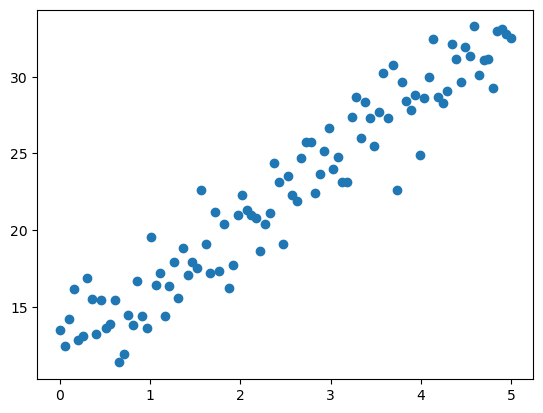

In [2]:
np.random.seed(42)
x = np.linspace(0, 5, 100)
y = 12.5 + 4.1*x + np.random.normal(size = 100, scale = 2)
plt.scatter(x, y)

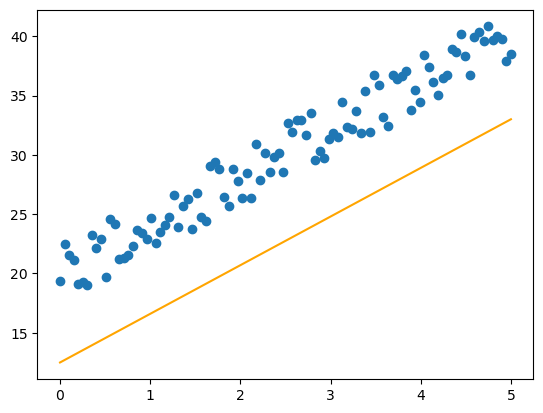

In [9]:
np.random.seed(42)
x = np.linspace(0, 5, 100)
#y = 12.5 + 4.1*x + np.random.normal(size = 100, scale = 2)
y = 12.5 + 4.1*x + np.random.uniform(5,10,100)
plt.scatter(x, y)
plt.plot(n:=np.array([0,5]), (lambda x: 4.1*x + 12.5)(n), color = 'orange')


In [3]:
a = np.random.normal(size = 100, scale = 2)
a

array([-2.83074148, -0.84129065, -0.68542903, -1.60455454, -0.32257142,
        0.80810171,  3.7723718 ,  0.34915563,  0.51510078, -0.14889183,
       -3.83754243, -0.05302775,  0.12046042,  4.92648422, -0.38472193,
        0.60309468, -0.06942354, -2.33735608,  2.28564563,  1.50386607,
        1.58206389, -1.81877491,  2.80558862, -2.80370213,  1.17371419,
        4.38091125, -1.98107265, -1.13259546,  0.19930273, -1.00695131,
       -3.10132686,  0.13712595, -2.12460743,  0.94718486, -1.83884847,
        3.09986881, -1.56650658, -0.64412303,  1.62703443, -2.46172863,
        0.45491987,  2.61428551, -3.21496647,  0.36926772,  0.51976559,
        1.56364574, -2.47390142, -2.64091323,  1.04388313,  0.59396935,
        0.5009857 ,  0.69289642, -1.36004944,  0.46450739,  0.58614495,
       -1.42870284,  3.73154902,  0.94766584, -2.38260699,  1.31310722,
       -1.94936334,  1.57416921,  2.31719116, -1.64136464,  1.92675226,
        0.82556185,  1.64412032,  3.79358597, -0.49077623, -1.50

(array([ 4., 11., 16., 13., 24., 19.,  4.,  3.,  4.,  2.]),
 array([-3.83754243, -2.90975435, -1.98196628, -1.0541782 , -0.12639013,
         0.80139795,  1.72918603,  2.6569741 ,  3.58476218,  4.51255026,
         5.44033833]),
 <BarContainer object of 10 artists>)

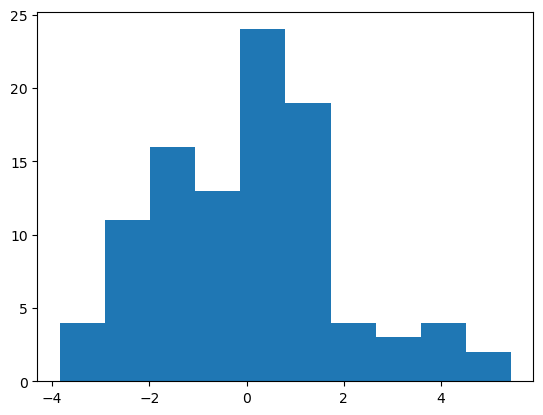

In [4]:
plt.hist(a)

In [5]:
a.std()

np.float64(1.8977772810212923)

In [6]:
a.mean()

np.float64(0.04460917409984777)

In [11]:
import random

In [12]:
random.random()

0.41230037287894217

In [13]:
random.randint(1,5)

5

In [14]:
random.uniform(1,5)

2.5984296253358736

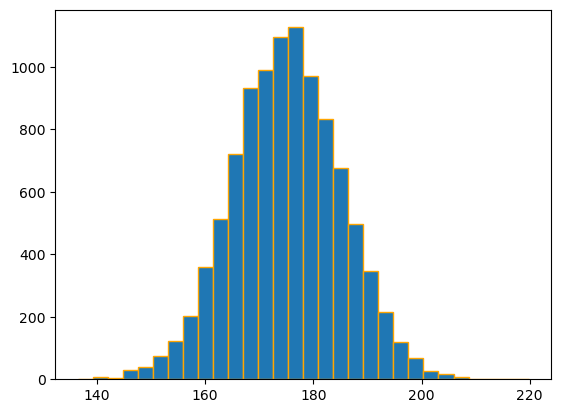

In [16]:
plt.hist(np.random.normal(175, 10, 10000), bins=30, edgecolor="orange")
plt.show()

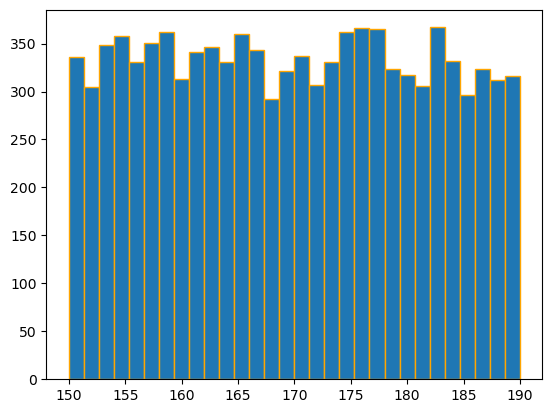

In [17]:
plt.hist(np.random.uniform(150, 190, 10000), bins=30, edgecolor="orange")
plt.show()

### Problem 1

#### Adding a Bias Term

Your two variable model will use a column of ones to stand in as the multiplier of $\theta_0$.  Create a DataFrame with columns `['bias', 'x']` that contains a column of ones and the data `x`.

In [19]:
np.ones((len(x),1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [20]:
x.reshape(-1,1)

array([[0.        ],
       [0.05050505],
       [0.1010101 ],
       [0.15151515],
       [0.2020202 ],
       [0.25252525],
       [0.3030303 ],
       [0.35353535],
       [0.4040404 ],
       [0.45454545],
       [0.50505051],
       [0.55555556],
       [0.60606061],
       [0.65656566],
       [0.70707071],
       [0.75757576],
       [0.80808081],
       [0.85858586],
       [0.90909091],
       [0.95959596],
       [1.01010101],
       [1.06060606],
       [1.11111111],
       [1.16161616],
       [1.21212121],
       [1.26262626],
       [1.31313131],
       [1.36363636],
       [1.41414141],
       [1.46464646],
       [1.51515152],
       [1.56565657],
       [1.61616162],
       [1.66666667],
       [1.71717172],
       [1.76767677],
       [1.81818182],
       [1.86868687],
       [1.91919192],
       [1.96969697],
       [2.02020202],
       [2.07070707],
       [2.12121212],
       [2.17171717],
       [2.22222222],
       [2.27272727],
       [2.32323232],
       [2.373

In [21]:
X = np.concatenate((np.ones((len(x), 1)), x.reshape(-1, 1)), axis = 1)
X

array([[1.        , 0.        ],
       [1.        , 0.05050505],
       [1.        , 0.1010101 ],
       [1.        , 0.15151515],
       [1.        , 0.2020202 ],
       [1.        , 0.25252525],
       [1.        , 0.3030303 ],
       [1.        , 0.35353535],
       [1.        , 0.4040404 ],
       [1.        , 0.45454545],
       [1.        , 0.50505051],
       [1.        , 0.55555556],
       [1.        , 0.60606061],
       [1.        , 0.65656566],
       [1.        , 0.70707071],
       [1.        , 0.75757576],
       [1.        , 0.80808081],
       [1.        , 0.85858586],
       [1.        , 0.90909091],
       [1.        , 0.95959596],
       [1.        , 1.01010101],
       [1.        , 1.06060606],
       [1.        , 1.11111111],
       [1.        , 1.16161616],
       [1.        , 1.21212121],
       [1.        , 1.26262626],
       [1.        , 1.31313131],
       [1.        , 1.36363636],
       [1.        , 1.41414141],
       [1.        , 1.46464646],
       [1.

In [22]:
X = pd.DataFrame(X, columns = ['bias', 'x'])
X.head()

,bias,x
0,1.0,0.000000
1,1.0,0.050505
2,1.0,0.101010
3,1.0,0.151515
4,1.0,0.202020


### Problem 2

#### Gradient of MSE

Complete the function `mse_grad` below.  This function will take in an array of initial guesses for $[\theta_0, \theta_1]$.  Recall the formula for the partial derivative of the loss function with respect to $\theta_0$ as:

$$\frac{\partial}{\partial \theta_0} l(\overrightarrow{\theta}, \overrightarrow{x}, y_i) = 2(y_i - \theta_0x_0 - \theta_1x_1)(-x_0)$$

$$\frac{\partial}{\partial \theta_1} l(\overrightarrow{\theta}, \overrightarrow{x}, y_i) = 2(y_i - \theta_0x_0 - \theta_1x_1)(-x_1)$$

You function will return the array

$$[\frac{\partial l}{\partial \theta_0}, \frac{\partial l}{\partial \theta_1}]$$

Remember to find the mean of the gradient array.

In [25]:
x = np.linspace(0, 5, 100)
y = 12.5 + 4.1*x + np.random.normal(size = 100, scale = 2)

In [26]:
def mse_grad(theta, x, y):
    x0 = x.iloc[:, 0]
    x1 = x.iloc[:, 1]
    dt0 = np.mean(-2*(y - theta[0]*x0 - theta[1]*x1)*x0)
    dt1 = np.mean(-2*(y - theta[0]*x0 - theta[1]*x1)*x1)
    return np.array([dt0, dt1])

In [27]:
mse_grad(np.array([0, 0]), X, y)

array([ -45.30976518, -130.47351875])

### Problem 3

#### Gradient Descent

Use the initial value for `theta` and a learning rate of `lr = 0.01` to perform 1000 iterations of gradient descent.  Keep track of the updated array of theta as `thetas` below.  Recall the gradient descent formula as:

$$\theta_{i + 1} = \theta_{i} - lr*grad(mse(\theta_{i}))$$

In [28]:
theta = np.array([0, 0])
thetas = []
lr = 0.01
for i in range(1000):
    thetas.append(theta)
    theta = theta - lr*mse_grad(theta, X, y)

In [29]:
thetas[-3:]

[array([12.44066805,  4.07647118]),
 array([12.44112879,  4.07632973]),
 array([12.44158738,  4.07618893])]

### Problem 4

#### DataFrame of updates

Below, create a DataFrame that holds your theta updates from the list `thetas` as `thetas_df` below.  Name the columns `intercept`, `slope`.  Did these values converge as desired?!

In [30]:
thetas_df = pd.DataFrame(thetas, columns = ['intercept', 'slope'])

In [31]:
thetas_df.tail(1)

,intercept,slope
999,12.441587,4.076189


#### Comparing with `sklearn`

Below, a regression model from sklearn is fit and the coefficients are shown.  These should be very close to what your gradient descent routine found.  To get closer feel free to experiment with the learning rate and number of iterations.  Beware that too many iterations and too small a learning rate will be very slow to train!

In [32]:
lr = LinearRegression(fit_intercept=False).fit(X, y)
lr.coef_

array([12.53976491,  4.04604707])

### Codio Activity 15.8: Tracing the Descent


This activity focuses on visualizing the descent of the gradient to optimal parameters for a regression model.  Datasets with different parameter settings are given below, and you are to use the visualization of the path of descent to describe the parameters of the model.  As a reminder, the model is built on a simple linear dataset with noise added as: 

$$y = 4.1x + 12.5 + \epsilon$$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

### The Data

Four implementations of gradient descent on the data were performed and the datasets match the following parameter settings:

- Example 1: Learning Rate = 1 with 100 iterations
- Example 2: Learning Rate = .1 with 1000 iterations
- Example 1: Learning Rate = .001 with 100 iterations
- Example 1: Learning Rate = .001 with 1000 iterations

In [34]:
#lr = 1.0 iterations = 100
ex1 = pd.read_csv('data/thetas_A.csv')
#lr = 0.1 iterations = 1000
ex2 = pd.read_csv('data/thetas_B.csv')
#lr = 0.001 iterations = 100
ex3 = pd.read_csv('data/thetas_C.csv')
#lr = 0.001 iterations = 1000
ex4 = pd.read_csv('data/thetas_D.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/thetas_A.csv'

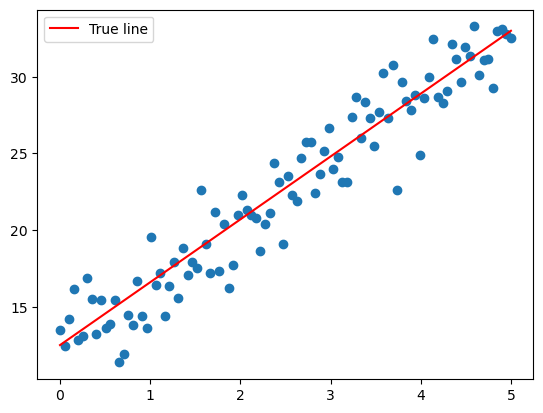

In [35]:
np.random.seed(42)
x = np.linspace(0, 5, 100)
y = 12.5 + 4.1*x + np.random.normal(size = 100, scale = 2)
plt.scatter(x, y)
plt.plot(x, 12.5 + 4.1*x, '-r', label = 'True line')
plt.legend();

In [36]:
X = np.concatenate((np.ones((len(x), 1)), x.reshape(-1, 1)), axis = 1) #add the bias term
X = pd.DataFrame(X, columns = ['bias', 'x']) #create the DataFrame

In [37]:
def mse(theta0, theta1):
    '''
    Computes mean squared error using 
    parameters for intercept and coefficient 
    of a single dimension linear function.
    '''
    yhat = theta0*X.values[:, 0] + theta1*X.values[:, 1]
    error = y - yhat
    squared_error = np.sum(error**2)
    return 1/(2*X.shape[0]) * squared_error

In [38]:
theta1 = np.linspace(3, 5, 100)
theta0 = np.linspace(11, 13, 100)
T1, T0 = np.meshgrid(theta0, theta1) #defining range of possibilities for plotting

In [39]:
mse = np.vectorize(mse) #vectorizing the function

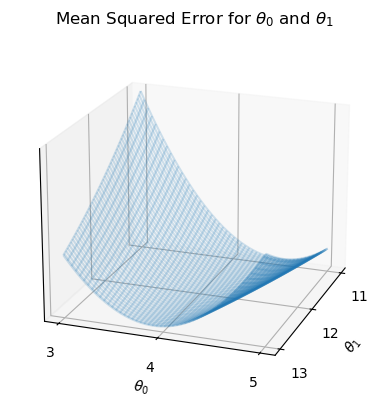

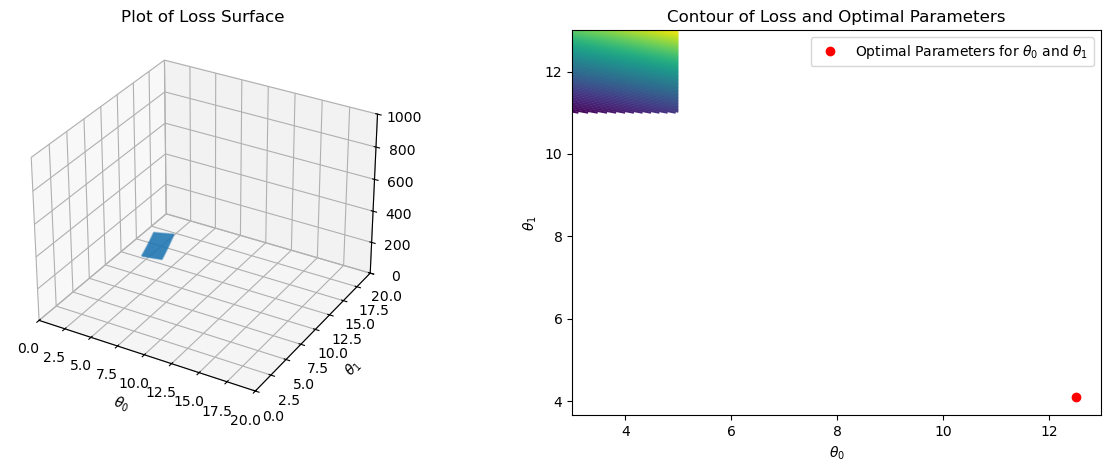

In [40]:
ax = plt.axes(projection = '3d')
ax.plot_wireframe(T1, T0, mse(T1, T0), alpha = 0.2)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_0$')
ax.set_title(r'Mean Squared Error for $\theta_0$ and $\theta_1$')
ax.set_zticks([])
ax.set_yticks([3, 4, 5])
ax.view_init(20, 20)
ax.set_xticks([11, 12, 13]);

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot_wireframe(T0, T1, mse(T0, T1), alpha = 0.2)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 1000)
ax.set_title('Plot of Loss Surface')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(T0, T1, mse(T0, T1), levels = 100)
ax2.plot(12.5, 4.1, 'ro', label = r'Optimal Parameters for $\theta_0$ and $\theta_1$')
ax2.legend()
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_title('Contour of Loss and Optimal Parameters');

### Problem 1

#### Example Parameters lr = 1 and iterations = 100


Which of the following seems to be happening based on the plot of the gradient curve below and dataset. 

- a. Converged to optimal thetas
- b. Converged to improper thetas
- c. Did not converge
- d. Will eventually converge with more iterations

Enter your solution as a string for your answer choice to `ans1` below.

In [41]:
t1s = ex1.iloc[:, 1]#[::10]
t0s = ex1.iloc[:, 0]#[::10]
theta1 = np.linspace(0, 20, 100)
theta0 = np.linspace(0, 20, 100)
T1, T0 = np.meshgrid(theta0, theta1)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot3D(t0s, t1s, mse(t0s, t1s), '-->', color = 'red')
ax.plot_wireframe(T0, T1, mse(T0, T1), alpha = 0.2)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 1000)
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(T0, T1, mse(T0, T1), levels = 30)
ax2.plot(t0s, t1s, mse(t0s, t1s), color = 'red')
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 20)

NameError: name 'ex1' is not defined